#### **Projeto Final: Estratégias de Investimento - Longo Prazo**

> *Julia Cerqueira e Gabriel Finamore*

In [2]:
# Importação das bibliotecas utilizadas
from typing import Optional
# Dados
import yfinance as yf
import numpy as np
import pandas as pd

# Modelo matemático e estatístico
from scipy.optimize import minimize
from scipy.stats import norm
import statsmodels.api as sm

# Plotagem
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px

### Seleção dos ativos

In [3]:
# tickers = ['ALPA4.SA', 'ABEV3.SA', 'ASAI3.SA', 'AURE3.SA', 'AZUL4.SA', 'B3SA3.SA', 'BBSE3.SA', 'BRAP4.SA', 'BBAS3.SA', 'BRKM5.SA', 'BRFS3.SA', 'BPAC11.SA', 'CXSE3.SA', 'CRFB3.SA', 'CCRO3.SA', 'CMIG4.SA', 'COGN3.SA', 'CPLE6.SA', 'CSAN3.SA', 'CPFE3.SA', 'CMIN3.SA', 'CVCB3.SA', 'CYRE3.SA', 'ELET3.SA', 'ELET6.SA', 'EMBR3.SA', 'ENGI11.SA', 'ENEV3.SA', 'EGIE3.SA', 'EQTL3.SA', 'EZTC3.SA', 'FLRY3.SA', 'GGBR4.SA', 'GOAU4.SA', 'NTCO3.SA', 'HAPV3.SA', 'HYPE3.SA', 'IGTI11.SA', 'IRBR3.SA', 'ITSA4.SA', 'ITUB4.SA', 'JBSS3.SA', 'KLBN11.SA', 'RENT3.SA', 'LREN3.SA', 'LWSA3.SA', 'MGLU3.SA', 'MRFG3.SA', 'BEEF3.SA', 'MRVE3.SA', 'MULT3.SA', 'PCAR3.SA', 'PETR3.SA', 'PETR4.SA', 'RECV3.SA', 'PRIO3.SA', 'PETZ3.SA', 'RADL3.SA', 'RAIZ4.SA', 'RDOR3.SA', 'RAIL3.SA', 'SBSP3.SA', 'SANB11.SA', 'STBP3.SA', 'SMTO3.SA', 'CSNA3.SA', 'SLCE3.SA', 'SUZB3.SA', 'TAEE11.SA', 'VIVT3.SA', 'TIMS3.SA', 'TOTS3.SA', 'TRPL4.SA', 'UGPA3.SA', 'USIM5.SA', 'VALE3.SA', 'VAMO3.SA', 'VBBR3.SA', 'VIVA3.SA', 'WEGE3.SA']  
    
start_date = '2015-01-01'
end_date = '2024-09-30'

# Empresas com IPO mais cedo

tickers = ['ABEV3.SA', 'B3SA3.SA', 'BRAP4.SA', 'BBAS3.SA', 'BRKM5.SA', 'BRFS3.SA', 'BPAC11.SA', 'CCRO3.SA', 'CMIG4.SA', 'CPLE6.SA', 'CSAN3.SA', 'CPFE3.SA', 'CVCB3.SA', 'CYRE3.SA', 'ELET6.SA', 'EMBR3.SA', 'EGIE3.SA', 'EQTL3.SA', 'EZTC3.SA', 'GGBR4.SA', 'GOAU4.SA', 'HYPE3.SA', 'ITUB4.SA', 'JBSS3.SA', 'MGLU3.SA', 'PETR4.SA', 'RAIZ4.SA', 'RDOR3.SA', 'SUZB3.SA', 'VIVT3.SA', 'TIMS3.SA', 'TOTS3.SA', 'VALE3.SA']  


def get_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    # data = data.dropna(how='any')  # Remover datas com dados faltantes
    return data

data = get_data(tickers, start_date, end_date)

display(data)

[*********************100%%**********************]  33 of 33 completed


Ticker,ABEV3.SA,B3SA3.SA,BBAS3.SA,BPAC11.SA,BRAP4.SA,BRFS3.SA,BRKM5.SA,CCRO3.SA,CMIG4.SA,CPFE3.SA,...,JBSS3.SA,MGLU3.SA,PETR4.SA,RAIZ4.SA,RDOR3.SA,SUZB3.SA,TIMS3.SA,TOTS3.SA,VALE3.SA,VIVT3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,10.964506,2.187156,6.165407,NaN,1.825824,57.139935,11.003017,10.530488,2.737522,11.422264,...,7.197921,2.058074,3.004428,NaN,NaN,17.277538,7.961514,10.238996,11.635607,19.901850
2015-01-05,10.766022,2.127361,6.037470,NaN,1.808345,56.055580,10.339426,10.230025,2.666944,11.274338,...,7.232036,2.096750,2.747639,NaN,NaN,17.277538,7.771631,9.924388,11.460638,19.507179
2015-01-06,11.176679,2.148060,6.121856,NaN,1.889015,56.560997,10.118227,10.380259,2.643419,11.480147,...,7.061468,2.069124,2.657763,NaN,NaN,17.277538,7.758067,9.303757,11.919936,19.023054
2015-01-07,11.334098,2.233153,6.391335,NaN,1.938762,59.088097,10.111907,11.160028,2.643419,11.885327,...,7.259326,2.138187,2.782947,NaN,NaN,17.277538,7.785193,9.237974,12.357364,19.675571
2015-01-08,12.017050,2.203256,6.413110,NaN,1.966995,58.031311,10.137187,11.288799,2.622032,12.129723,...,7.320732,2.121613,2.962699,NaN,NaN,17.277538,8.137832,9.452479,12.488593,20.475426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-23,12.750000,11.104932,27.400000,32.790001,18.280001,24.830000,18.750000,12.360000,11.364798,33.340000,...,31.809999,10.020000,36.630001,3.04,31.632759,51.650002,18.606054,28.600000,57.529999,54.930000
2024-09-24,12.760000,11.154508,27.379999,32.700001,19.070000,24.680000,19.219999,12.270000,11.330000,33.240002,...,32.020000,10.190000,36.779999,3.10,32.000927,53.009998,18.790001,29.010000,60.340000,55.279999
2024-09-25,12.680000,10.790000,27.299999,32.849998,19.219999,25.270000,20.070000,12.370000,11.340000,33.209999,...,31.230000,10.000000,37.049999,3.04,31.553152,52.160000,18.740000,28.629999,60.610001,55.500000


### Remover linhas que tenham NaN para possibilitar a alocação do portfólio

In [4]:
# Encontrar o índice da primeira linha que não contém NaN
primeira_data_valida = data.dropna(how='any').first_valid_index()

# Fatiar o DataFrame a partir dessa linha até o final
data = data.loc[primeira_data_valida:]

display(data)

Ticker,ABEV3.SA,B3SA3.SA,BBAS3.SA,BPAC11.SA,BRAP4.SA,BRFS3.SA,BRKM5.SA,CCRO3.SA,CMIG4.SA,CPFE3.SA,...,JBSS3.SA,MGLU3.SA,PETR4.SA,RAIZ4.SA,RDOR3.SA,SUZB3.SA,TIMS3.SA,TOTS3.SA,VALE3.SA,VIVT3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2021-08-05,14.440321,13.699893,12.160295,27.398663,19.982782,23.369267,45.205173,11.891300,4.359004,19.263037,...,24.624796,191.367157,10.138710,6.362808,66.109871,50.097424,8.972691,36.027355,78.306763,34.097229
2021-08-06,14.857369,13.865582,12.530818,27.880714,19.913830,23.226480,46.069950,11.853668,4.400304,19.270739,...,25.102200,193.424866,10.153014,6.239771,65.696274,49.849548,9.140330,35.768162,78.751846,34.534477
2021-08-09,14.909501,13.752217,12.416507,29.021160,19.756617,23.531092,46.583927,12.041821,4.419076,19.386271,...,25.371702,191.647751,10.081488,6.213407,65.536484,51.749889,9.148311,35.825764,78.256508,34.757233
2021-08-10,14.518516,13.525484,12.101169,28.826450,19.646290,23.226480,46.494186,11.693738,4.340232,19.101290,...,25.040598,190.805954,10.113676,6.239771,65.743271,52.172192,9.020586,35.307381,79.010284,33.824974
2021-08-11,14.396877,13.124341,11.982914,28.140331,19.626984,23.178886,46.282066,11.562031,4.359004,18.870228,...,25.417902,195.576111,10.253150,6.037638,65.733871,51.869236,9.172261,34.558609,78.443161,34.319984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-23,12.750000,11.104932,27.400000,32.790001,18.280001,24.830000,18.750000,12.360000,11.364798,33.340000,...,31.809999,10.020000,36.630001,3.040000,31.632759,51.650002,18.606054,28.600000,57.529999,54.930000
2024-09-24,12.760000,11.154508,27.379999,32.700001,19.070000,24.680000,19.219999,12.270000,11.330000,33.240002,...,32.020000,10.190000,36.779999,3.100000,32.000927,53.009998,18.790001,29.010000,60.340000,55.279999
2024-09-25,12.680000,10.790000,27.299999,32.849998,19.219999,25.270000,20.070000,12.370000,11.340000,33.209999,...,31.230000,10.000000,37.049999,3.040000,31.553152,52.160000,18.740000,28.629999,60.610001,55.500000


In [5]:
# Quantidade de valores nulos por coluna
nulos_por_coluna = data.isnull().sum()

print("Valores nulos por coluna:")
print(nulos_por_coluna)

# Todas as linhas que contêm valores nulos
linhas_com_nulos = data[data.isnull().any(axis=1)]

print("\nLinhas com valores nulos:")
print(linhas_com_nulos)

Valores nulos por coluna:
Ticker
ABEV3.SA     0
B3SA3.SA     0
BBAS3.SA     0
BPAC11.SA    0
BRAP4.SA     0
BRFS3.SA     0
BRKM5.SA     0
CCRO3.SA     0
CMIG4.SA     0
CPFE3.SA     0
CPLE6.SA     0
CSAN3.SA     0
CVCB3.SA     0
CYRE3.SA     0
EGIE3.SA     0
ELET6.SA     0
EMBR3.SA     0
EQTL3.SA     0
EZTC3.SA     0
GGBR4.SA     0
GOAU4.SA     0
HYPE3.SA     0
ITUB4.SA     0
JBSS3.SA     0
MGLU3.SA     0
PETR4.SA     0
RAIZ4.SA     0
RDOR3.SA     0
SUZB3.SA     0
TIMS3.SA     0
TOTS3.SA     0
VALE3.SA     0
VIVT3.SA     0
dtype: int64

Linhas com valores nulos:
Empty DataFrame
Columns: [ABEV3.SA, B3SA3.SA, BBAS3.SA, BPAC11.SA, BRAP4.SA, BRFS3.SA, BRKM5.SA, CCRO3.SA, CMIG4.SA, CPFE3.SA, CPLE6.SA, CSAN3.SA, CVCB3.SA, CYRE3.SA, EGIE3.SA, ELET6.SA, EMBR3.SA, EQTL3.SA, EZTC3.SA, GGBR4.SA, GOAU4.SA, HYPE3.SA, ITUB4.SA, JBSS3.SA, MGLU3.SA, PETR4.SA, RAIZ4.SA, RDOR3.SA, SUZB3.SA, TIMS3.SA, TOTS3.SA, VALE3.SA, VIVT3.SA]
Index: []

[0 rows x 33 columns]


# Alocação Inicial

### Portfólio com pesos iguais

In [6]:
def initial_allocation(data):
    # Cálculo de retornos logarítmicos diários
    log_returns = np.log(data / data.shift(1))
    
    # Alocação inicial de pesos igualmente ponderada
    num_assets = len(data.columns)
    weights = np.array([1 / num_assets] * num_assets)
    
    return log_returns, weights

log_returns, weights = initial_allocation(data)
print("Log Returns:")
print(log_returns.iloc[1:])
print("Initial Weights:")
print(weights)

Log Returns:
Ticker      ABEV3.SA  B3SA3.SA  BBAS3.SA  BPAC11.SA  BRAP4.SA  BRFS3.SA  \
Date                                                                      
2021-08-06  0.028472  0.012022  0.030015   0.017441 -0.003457 -0.006129   
2021-08-09  0.003503 -0.008210 -0.009164   0.040090 -0.007926  0.013030   
2021-08-10 -0.026574 -0.016624 -0.025725  -0.006732 -0.005600 -0.013030   
2021-08-11 -0.008413 -0.030107 -0.009820  -0.024090 -0.000983 -0.002051   
2021-08-12  0.000603 -0.080209 -0.021950  -0.029424 -0.025621 -0.018653   
...              ...       ...       ...        ...       ...       ...   
2024-09-23 -0.000784 -0.035091 -0.003643  -0.016334  0.001095 -0.011612   
2024-09-24  0.000784  0.004454 -0.000730  -0.002749  0.042309 -0.006059   
2024-09-25 -0.006289 -0.033224 -0.002926   0.004577  0.007835  0.023625   
2024-09-26  0.012539  0.005545  0.006572   0.009694  0.062520 -0.025247   
2024-09-27  0.006211 -0.011122 -0.008405   0.027652 -0.007851 -0.015542   

Ticker     

# Estratégia

### Ideia Inicial

- Quando abordamos risco em investimento, temos a ideia principal de que está ligada com a variância dos retornos - sobretudo os negativos.
- A ideia principal do nosso projeto é realizar uma minimização da variância do portfólio, para mitigar os riscos de um possível drawdown.

### Fórmula para 2 bens

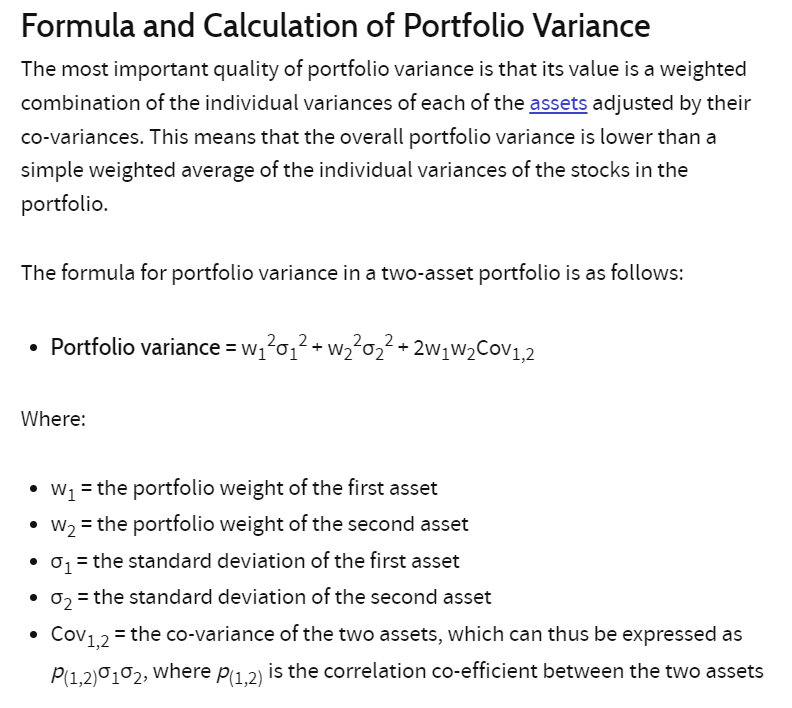

https://www.investopedia.com/terms/p/portfolio-variance.asp


In [7]:
pd.set_option('display.max_rows', 75)
pd.set_option('display.max_columns', 33)

# Execução da Estratégia

In [8]:
# Função para calcular os retornos logarítmicos
def calculate_log_returns(df):
    return np.log(df / df.shift(1)).dropna()

# Função para calcular a volatilidade do portfólio
def portfolio_volatility(weights, cov_matrix):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

# Função para otimizar a alocação de pesos minimizando a volatilidade
def minimize_volatility(cov_matrix):
    num_assets = len(cov_matrix)
    args = (cov_matrix,)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0, 1) for _ in range(num_assets))
    weights = num_assets * [1. / num_assets, ]
    result = minimize(portfolio_volatility, weights, args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result.x

# Função para selecionar os 20 melhores ativos com base nos retornos acumulados dos últimos 3 meses
def select_top_assets(log_returns, num_assets=20, period=3):
    # Calcular os retornos acumulados dos últimos 'period' meses
    returns_last_period = (log_returns + 1).rolling(window=period * 22).apply(np.prod, raw=True) - 1
    returns_last_period = returns_last_period.iloc[-1]  # Pega os retornos do último período (último valor da janela)
    # Selecionar os ativos com os maiores retornos acumulados
    top_assets = returns_last_period.nlargest(num_assets).index
    return top_assets

# Df para armazenar o histórico de pesos do portfólio
portfolio_weights = pd.DataFrame(columns=data.columns, index=data.index)

# Retornos logarítmicos
log_returns = calculate_log_returns(data)

# Primeira alocação com pesos iguais
initial_weights = np.array([1 / len(data.columns)] * len(data.columns))
portfolio_weights.iloc[0:22] = initial_weights

# Definindo o rebalanceamento para cada 1 mes
rebalance_period = 1

# Loop para rebalancear o portfólio
for i in range(0, len(log_returns), rebalance_period * 22):  # 22 porque há aproximadamente 22 dias úteis no mês
    if i == 0:
        # Primeira alocação feita com pesos iguais
        continue
    
    # Selecionar os últimos 3 meses de retornos para calcular o desempenho dos ativos
    past_returns = log_returns.iloc[max(0, i - rebalance_period * 22):i]
    if len(past_returns) < rebalance_period * 22:
        # Não realizar mudança se não houver dados suficientes
        continue
    
    # Selecionar as 20 ações com os melhores retornos dos últimos 3 meses
    top_assets = select_top_assets(past_returns, num_assets=20, period=3)
    
    # Calcular a matriz de covariância dos retornos dos 20 melhores ativos
    cov_matrix = past_returns[top_assets].cov()
    
    # Otimizar a alocação de pesos para minimizar a volatilidade usando apenas os 20 melhores ativos
    optimized_weights = minimize_volatility(cov_matrix)
    
    # Expandir os pesos otimizados para incluir todos os ativos, preenchendo com 0 para os não selecionados
    expanded_weights = np.zeros(len(data.columns))
    expanded_weights[data.columns.get_indexer(top_assets)] = optimized_weights
    
    # Aplicar a alocação otimizada a partir do ponto atual até o próximo rebalanceamento
    portfolio_weights.iloc[i:i + rebalance_period * 22] = expanded_weights


# Retorno do portfólio diário
portfolio_daily_returns = (log_returns * portfolio_weights.shift(1)).sum(axis=1)

# Retorno acumulado sem ser logaritmico 'normal'
cumulative_returns_normal = (1 + portfolio_daily_returns).cumprod()

# Cálculo do retorno acumulado logarítmico
cumulative_returns_log = np.log(cumulative_returns_normal.astype(float).replace(0, np.nan))  # Evitar log(0) substituindo 0 por NaN

# Cálculo Max Drawdown
rolling_max = cumulative_returns_normal.cummax()
drawdown = cumulative_returns_normal / rolling_max - 1
max_drawdown = drawdown.min()

print(f'Max Drawdown do Portfólio: {max_drawdown:.2%}')
print(portfolio_weights.tail(5))

# Evolução dos pesos do portfólio ao longo do tempo
fig1 = px.line(portfolio_weights, title='Evolução dos Pesos do Portfólio Rebalanceado a Cada Mês')
fig1.update_layout(
    yaxis_title='Peso',
    xaxis_title='',
    legend_title_text='Ativos'
)
fig1.show()

# Retorno acumulado normal
fig2 = go.Figure()
fig2.add_trace(go.Scatter(
    x=cumulative_returns_normal.index,
    y=cumulative_returns_normal.values,
    mode='lines',
    name='Retorno Acumulado Normal'
))
fig2.update_layout(
    title='Retorno Acumulado do Portfólio',
    xaxis_title='',
    yaxis_title='Retorno Acumulado'
)
fig2.show()

# Retorno acumulado logaritmico
fig4 = go.Figure()
fig4.add_trace(go.Scatter(
    x=cumulative_returns_log.index,
    y=cumulative_returns_log.values,
    mode='lines',
    name='Retorno Acumulado Normal'
))
fig4.update_layout(
    title='Log Retorno Acumulado do Portfólio',
    xaxis_title='',
    yaxis_title='Retorno Acumulado'
)
fig4.show()

# Max Drawdown
fig3 = go.Figure()
fig3.add_trace(go.Scatter(
    x=drawdown.index,
    y=drawdown.values,
    mode='lines',
    name='Max Drawdown'
))
fig3.update_layout(
    title='Max Drawdown do Portfólio',
    xaxis_title='',
    yaxis_title='Drawdown'
)
fig3.show()


Max Drawdown do Portfólio: -16.09%
Ticker      ABEV3.SA B3SA3.SA  BBAS3.SA BPAC11.SA  BRAP4.SA BRFS3.SA  \
Date                                                                   
2024-09-23  0.152723      0.0  0.231392       0.0  0.156257      0.0   
2024-09-24  0.152723      0.0  0.231392       0.0  0.156257      0.0   
2024-09-25  0.152723      0.0  0.231392       0.0  0.156257      0.0   
2024-09-26  0.152723      0.0  0.231392       0.0  0.156257      0.0   
2024-09-27  0.152723      0.0  0.231392       0.0  0.156257      0.0   

Ticker      BRKM5.SA CCRO3.SA  CMIG4.SA  CPFE3.SA  CPLE6.SA CSAN3.SA CVCB3.SA  \
Date                                                                            
2024-09-23  0.109642      0.0  0.022011  0.036416  0.125744      0.0      0.0   
2024-09-24  0.109642      0.0  0.022011  0.036416  0.125744      0.0      0.0   
2024-09-25  0.109642      0.0  0.022011  0.036416  0.125744      0.0      0.0   
2024-09-26  0.109642      0.0  0.022011  0.036416  0.12

c:\Users\gabri\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


## Métricas de Risco

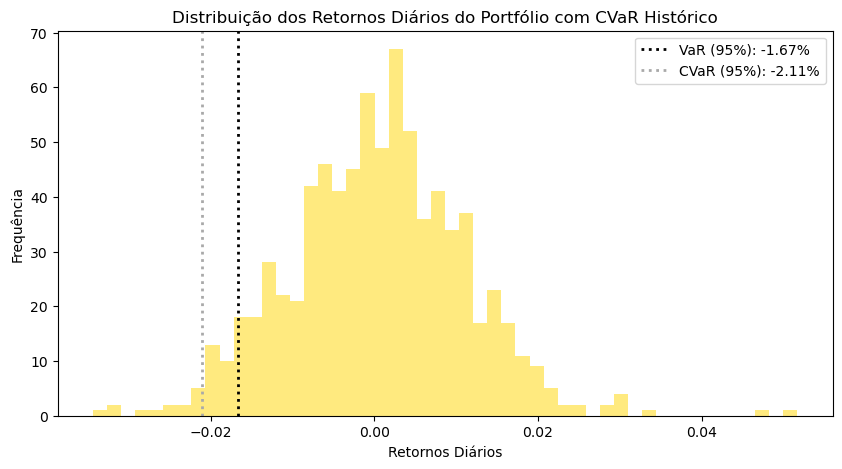


Métricas de Risco:
Volatilidade : 0.16829467035505644
EMWA: 0.16821291326852467


In [9]:
def calculate_risk_metrics(portfolio_daily_returns, portfolio_weights):
    # Volatilidade
    #vol = np.sqrt(np.dot(portfolio_weights.T, np.dot(log_returns.cov() * 252, portfolio_weights)))
    
    # Value at Risk (VaR) não paramétrico
    #portfolio_returns = np.sum(weights * log_returns, axis=1)
    VaR = np.percentile(portfolio_daily_returns, 5)
    
    # Conditional VaR (CVaR)
    CVaR = portfolio_daily_returns[portfolio_daily_returns <= VaR].mean()
    
    # EWMA (Volatilidade ponderada)
    ewma_vol = portfolio_daily_returns.ewm(span=60).std().mean() * np.sqrt(252)
    
    # Plotando histograma com VaR e CVaR dos retornos
    plt.figure(figsize=(10, 5))
    
    plt.hist(portfolio_daily_returns, bins=50, alpha=0.5, color='gold')
    
    plt.axvline(VaR, color='black', linestyle=':', linewidth=2, label=f'VaR (95%): {VaR:.2%}')
    plt.axvline(CVaR, color='darkgray', linestyle=':', linewidth=2, label=f'CVaR (95%): {CVaR:.2%}')
    
    plt.xlabel('Retornos Diários')
    plt.ylabel('Frequência')
    plt.title('Distribuição dos Retornos Diários do Portfólio com CVaR Histórico')
    plt.legend()
    
    plt.show()
    
    return ewma_vol

ewma_vol = calculate_risk_metrics(portfolio_daily_returns, portfolio_weights)

# Volatilidade
vol = portfolio_daily_returns.std()
annual_vol = vol * np.sqrt(252)

# Resultados
print("\nMétricas de Risco:")
print(f"Volatilidade : {annual_vol}")
print(f"EMWA: {ewma_vol}")

# Performance

### Comparação com benchmark (Ibovespa)

In [10]:
benchmark = ['^BVSP'] # Ibovespa

start_date = '2021-08-05'
end_data = '2024-09-30'

def get_data(benchmarks, start_date, end_date):
    benchmark = yf.download(benchmarks, start = start_date, end = end_date)['Adj Close']
    return benchmark

benchmark = get_data(benchmark, start_date, end_date)

benchmark = benchmark.to_frame()
display(benchmark)

[*********************100%%**********************]  1 of 1 completed


,Adj Close
Date,
2021-08-05,121633.0
2021-08-06,122810.0
2021-08-09,123019.0
2021-08-10,122202.0
2021-08-11,122056.0
...,...
2024-09-23,130568.0
2024-09-24,132156.0
2024-09-25,131586.0


In [11]:
# Encontrar o índice da primeira linha que não contém NaN
primeira_linha_valida = benchmark.dropna(how='any').first_valid_index()

# Fatiar o DataFrame a partir dessa linha até o final
benchmark = benchmark.loc[primeira_linha_valida:]

display(benchmark)

,Adj Close
Date,
2021-08-05,121633.0
2021-08-06,122810.0
2021-08-09,123019.0
2021-08-10,122202.0
2021-08-11,122056.0
...,...
2024-09-23,130568.0
2024-09-24,132156.0
2024-09-25,131586.0


In [12]:
# Calculando o retorno logarítmico
log_returns = np.log(benchmark / benchmark.shift(1))

# Calculando o retorno acumulado
cumulative_returns = log_returns.cumsum()

In [13]:
# Calculando os retornos lineares
linear_returns = benchmark.pct_change()

# Calculando o retorno acumulado linear
cumulative_returns_linear = (1 + linear_returns).cumprod()

# Ajustando o valor inicial para 1
cumulative_returns_linear.iloc[0] = 1
print(cumulative_returns_linear)

            Adj Close
Date                 
2021-08-05   1.000000
2021-08-06   1.009677
2021-08-09   1.011395
2021-08-10   1.004678
2021-08-11   1.003478
...               ...
2024-09-23   1.073459
2024-09-24   1.086514
2024-09-25   1.081828
2024-09-26   1.093535
2024-09-27   1.091233

[788 rows x 1 columns]


### Gráfico com comparativo

In [17]:
# Garantindo que a séries temporais tenham o mesmo formato de data
cumulative_returns_log.index = cumulative_returns_log.index.tz_localize(None)
cumulative_returns.index = cumulative_returns.index.tz_localize(None)

# Certificando-se de que ambos os índices são DatetimeIndex
cumulative_returns_log.index = pd.to_datetime(cumulative_returns_log.index)
cumulative_returns.index = pd.to_datetime(cumulative_returns.index)

# Garantindo que ambos sejam Series
cumulative_returns_log = pd.Series(cumulative_returns_log)
cumulative_returns = pd.Series(cumulative_returns)

# Garantindo que ambos sejam Series (de uma única dimensão)
cumulative_returns = cumulative_returns.squeeze()

# Alinhando as séries temporais para terem os mesmos índices
cumulative_returns_log, cumulative_returns = cumulative_returns_log.align(cumulative_returns, join='outer')

# Preenchendo valores ausentes com a última observação conhecida
cumulative_returns_log.fillna(method='ffill', inplace=True)
cumulative_returns.fillna(method='ffill', inplace=True)

# Criando função que gera o gráfico para comparar os retornos do portfólio e de um Benchmark qualquer
def plot_multiples_time_series_line_graphs(data_list: list, serie_title: Optional[str] = "", serie_xaxis_title: Optional[str] = "", 
                               serie_yaxis_title: Optional[str] = "") -> None:

    # Verifica se todos os elementos presentes na lista "data_list" são séries temporais.
    are_all_data_time_series = all(isinstance(df, pd.Series) for df in data_list)
    
    # Retorna um erro caso algum dos dados presentes na variável "data_list" não seja uma série temporal
    if not are_all_data_time_series:
        raise TypeError("Todos os dados presentes no parâmetro 'data_list' devem ser séries temporais.")
    
    # Verifica se as séries temporais presentes na variável "data_list" possuem os mesmos índices.
    are_all_index_equal = all(df.index.equals(data_list[0].index) for df in data_list)
    
    # Retorna um erro caso as séries temporais possuam índices diferentes.
    if not are_all_index_equal:
        raise ValueError("Todos as séries temporais devem possuir os mesmos índices.")
    
    # Verifica se todas as séries temporais presentes na variável "data_list" possuem o atributo "name".
    all_time_series_have_names = all(hasattr(df,"name") for df in data_list)
    
    # Retorna um erro caso uma das séries temporais presentes na variável "data_list" não possua o atributo "name".
    if not all_time_series_have_names:
        raise TypeError("Todas as séries temporais devem possuir o atributo 'name'")
    
    # Cria uma lista de timestamps que representará o eixo x do gráfico que será plotado
    x_axis = data_list[0].index.tolist() # só podemos fazer isso pois todas as séries temporais possuem os mesmos índices

    # Cria a figura onde será plotado o gráfico.
    fig = go.Figure()

    # Adiciona cada série temporal ao gráfico
    for time_serie in data_list:
        fig.add_trace(go.Scatter(x = x_axis, y = time_serie.values, mode = "lines", name = time_serie.name))
    
    # Atualiza o layout para permitir destaque ao clicar na legenda
    fig.update_layout(
        # Seta um título para o plot.
        title = serie_title,
        # Seta um título para o eixo x do plot.
        xaxis_title = serie_xaxis_title,
        # Seta um título para o eixo y do plot.
        yaxis_title = serie_yaxis_title,   
    )
    
    # Exibe o gráfico criado
    fig.show()


# Atribuindo nomes para as variáveis que servirão de legenda no gráfico 

cumulative_returns_log.name = 'Portfólio'
cumulative_returns.name = 'Benchmark (Ibovespa)'

# Criando a lista contendo as séries temporais dos retornos cumulativos das variáveis
data_list = [cumulative_returns_log, cumulative_returns]

# Exibe em um plot as séries temporais dos retornos cumulativos 
plot_multiples_time_series_line_graphs(data_list, "Log Retornos do Portfólio e do Benchmark", "", "Retorno acumulado")

C:\Users\gabri\AppData\Local\Temp\ipykernel_5324\2207668831.py:20: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\gabri\AppData\Local\Temp\ipykernel_5324\2207668831.py:21: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [16]:
print(type(cumulative_returns_log), cumulative_returns_log.shape)
print(type(cumulative_returns), cumulative_returns.shape)

<class 'pandas.core.series.Series'> (788,)
<class 'pandas.core.series.Series'> (788,)


In [15]:
cumulative_returns = cumulative_returns.squeeze()
print(type(cumulative_returns), cumulative_returns.shape)

<class 'pandas.core.series.Series'> (788,)


In [64]:
print(type(cumulative_returns_normal), cumulative_returns_normal.shape)
print(type(cumulative_returns_linear), cumulative_returns_linear.shape)

<class 'pandas.core.series.Series'> (788,)
<class 'pandas.core.frame.DataFrame'> (788, 1)


In [65]:
cumulative_returns_linear = cumulative_returns_linear.squeeze()  
print(type(cumulative_returns_linear), cumulative_returns_linear.shape)

<class 'pandas.core.series.Series'> (788,)


In [67]:
# Garantindo que a séries temporais tenham o mesmo formato de data
cumulative_returns_normal.index = cumulative_returns_normal.index.tz_localize(None)
cumulative_returns_linear.index = cumulative_returns_linear.index.tz_localize(None)

# Certificando-se de que ambos os índices são DatetimeIndex
cumulative_returns_normal.index = pd.to_datetime(cumulative_returns_normal.index)
cumulative_returns_linear.index = pd.to_datetime(cumulative_returns_linear.index)

# Garantindo que ambos sejam Series
cumulative_returns_normal = pd.Series(cumulative_returns_normal)
cumulative_returns_linear = pd.Series(cumulative_returns_linear)

# Garantindo que ambos sejam Series (de uma única dimensão)
cumulative_returns_linear = cumulative_returns_linear.squeeze()

# Alinhando as séries temporais para terem os mesmos índices
cumulative_returns_normal, cumulative_returns_linear = cumulative_returns_normal.align(cumulative_returns_linear, join='outer')

# Preenchendo valores ausentes com a última observação conhecida
cumulative_returns_normal.fillna(method='ffill', inplace=True)
cumulative_returns_linear.fillna(method='ffill', inplace=True)

# Criando função que gera o gráfico para comparar os retornos do portfólio e de um Benchmark qualquer
def plot_multiples_time_series_line_graphs(data_list: list, serie_title: Optional[str] = "", serie_xaxis_title: Optional[str] = "", 
                               serie_yaxis_title: Optional[str] = "") -> None:

    # Verifica se todos os elementos presentes na lista "data_list" são séries temporais.
    are_all_data_time_series = all(isinstance(df, pd.Series) for df in data_list)
    
    # Retorna um erro caso algum dos dados presentes na variável "data_list" não seja uma série temporal
    if not are_all_data_time_series:
        raise TypeError("Todos os dados presentes no parâmetro 'data_list' devem ser séries temporais.")
    
    # Verifica se as séries temporais presentes na variável "data_list" possuem os mesmos índices.
    are_all_index_equal = all(df.index.equals(data_list[0].index) for df in data_list)
    
    # Retorna um erro caso as séries temporais possuam índices diferentes.
    if not are_all_index_equal:
        raise ValueError("Todos as séries temporais devem possuir os mesmos índices.")
    
    # Verifica se todas as séries temporais presentes na variável "data_list" possuem o atributo "name".
    all_time_series_have_names = all(hasattr(df,"name") for df in data_list)
    
    # Retorna um erro caso uma das séries temporais presentes na variável "data_list" não possua o atributo "name".
    if not all_time_series_have_names:
        raise TypeError("Todas as séries temporais devem possuir o atributo 'name'")
    
    # Cria uma lista de timestamps que representará o eixo x do gráfico que será plotado
    x_axis = data_list[0].index.tolist() # só podemos fazer isso pois todas as séries temporais possuem os mesmos índices

    # Cria a figura onde será plotado o gráfico.
    fig = go.Figure()

    # Adiciona cada série temporal ao gráfico
    for time_serie in data_list:
        fig.add_trace(go.Scatter(x = x_axis, y = time_serie.values - 1, mode = "lines", name = time_serie.name))
    
    # Atualiza o layout para permitir destaque ao clicar na legenda
    fig.update_layout(
        # Seta um título para o plot.
        title = serie_title,
        # Seta um título para o eixo x do plot.
        xaxis_title = serie_xaxis_title,
        # Seta um título para o eixo y do plot.
        yaxis_title = serie_yaxis_title,   
    )
    
    # Exibe o gráfico criado
    fig.show()


# Atribuindo nomes para as variáveis que servirão de legenda no gráfico 

cumulative_returns_normal.name = 'Portfólio'
cumulative_returns_linear.name = 'Benchmark (Ibovespa)'

# Criando a lista contendo as séries temporais dos retornos cumulativos das variáveis
data_list = [cumulative_returns_normal, cumulative_returns_linear]

# Exibe em um plot as séries temporais dos retornos cumulativos 
plot_multiples_time_series_line_graphs(data_list, "Retornos do Portfólio e do Benchmark", "", "Retorno acumulado")

C:\Users\gabri\AppData\Local\Temp\ipykernel_15680\2865000772.py:20: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\gabri\AppData\Local\Temp\ipykernel_15680\2865000772.py:21: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

